In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls "/content/gdrive/My Drive/Python for Exploratory Data Analysis"

airbnb-listings.csv   properties.csv
ClimateDataEDA.ipynb  propertyDataAnalysis_NY.ipynb


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
#Load the dataset
property_data = pd.read_csv("/content/gdrive/My Drive/Python for Exploratory Data Analysis/properties.csv")

In [0]:
property_data.head(10)

,title,address,city,state,postal_code,price,facts and features,real estate provider,url
0,Condo For Sale,515 W 29th St APT 3N,New York,NY,10001,"$5,250,000","2 bds , 3 ba , 2,133 sqft",NaN,https://www.zillow.com/homedetails/515-W-29th-...
1,Condo For Sale,515 W 29th St APT 3S,New York,NY,10001,"$5,450,000","2 bds , 3 ba , 2,140 sqft",NaN,https://www.zillow.com/homedetails/515-W-29th-...
2,Condo For Sale,515 W 29th St APT 5S,New York,NY,10001,"$5,750,000","2 bds , 3 ba , 2,140 sqft",NaN,https://www.zillow.com/homedetails/515-W-29th-...
3,Condo For Sale,357 W 30TH St APT 2,NEW YORK,NY,10001,"$675,000","Studio , 1 ba , 453 sqft",Halstead Property,https://www.zillow.com/homedetails/357-W-30TH-...
4,Condo For Sale,520 W 28th St # 5,New York,NY,10001,"$6,450,000","3 bds , 4 ba , 2,065 sqft",NaN,https://www.zillow.com/homedetails/520-W-28th-...
5,Condo For Sale,261 W 25th St # 6A,New York,NY,10001,"$1,460,000","1 bd , 1 ba , 720 sqft",NaN,https://www.zillow.com/homedetails/261-W-25th-...
6,Condo For Sale,252 7TH Ave APT 10V,NEW YORK,NY,10001,"$2,875,000","2 bds , 2 ba , 1,478 sqft",NaN,https://www.zillow.com/homedetails/252-7TH-Ave...
7,Co-op For Sale,133 W 28th St APT 7B,New York,NY,10001,"$1,150,000","1 bd , 1 ba , 900 sqft",Compass,https://www.zillow.com/homedetails/133-W-28th-...
8,Condo For Sale,1182 Broadway APT 12B,New York,NY,10001,"$2,450,000","1 bd , 1 ba , 879 sqft",Douglas Elliman,https://www.zillow.com/homedetails/1182-Broadw...
9,Condo For Sale,520 W 28th St # 34,New York,NY,10001,"$16,000,000","4 bds , 5 ba , 4,023 sqft",NaN,https://www.zillow.com/homedetails/520-W-28th-...


In [0]:
#Questions:
#The price in relation to how many beds, baths and square feet
#the Price is relation to the type of the property
#The price in relation to the city and zipcode.

In [0]:
#drop the url and real estate provider
property_data = property_data.drop(['url','real estate provider'],axis=1)

#city to lower case
property_data['city'] = property_data['city'].str.lower()

In [0]:
property_data.head()

,title,address,city,state,postal_code,price,facts and features
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"$5,250,000","2 bds , 3 ba , 2,133 sqft"
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"$5,450,000","2 bds , 3 ba , 2,140 sqft"
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"$5,750,000","2 bds , 3 ba , 2,140 sqft"
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"$675,000","Studio , 1 ba , 453 sqft"
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"$6,450,000","3 bds , 4 ba , 2,065 sqft"


In [0]:
#Creating new columns to splt out the features.
new = property_data["facts and features"].str.split(', ', n=2,expand=True)

In [0]:
property_data['beds'] = new[0]
property_data['baths'] = new[1]
property_data['sqft'] = new[2]

In [0]:
property_data.head()

,title,address,city,state,postal_code,price,facts and features,beds,baths,sqft
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"$5,250,000","2 bds , 3 ba , 2,133 sqft",2 bds,3 ba,"2,133 sqft"
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"$5,450,000","2 bds , 3 ba , 2,140 sqft",2 bds,3 ba,"2,140 sqft"
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"$5,750,000","2 bds , 3 ba , 2,140 sqft",2 bds,3 ba,"2,140 sqft"
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"$675,000","Studio , 1 ba , 453 sqft",Studio,1 ba,453 sqft
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"$6,450,000","3 bds , 4 ba , 2,065 sqft",3 bds,4 ba,"2,065 sqft"


In [0]:
#Number of beds
property_data['beds'] = property_data['beds'].map(lambda x: x.rstrip(' bds'))

#number of baths
property_data['baths'] = property_data['baths'].map(lambda x: x.rstrip(' ba'))

#square ft
property_data['sqft'] = property_data['sqft'].map(lambda x: x.rstrip(' sqft'))

In [0]:
property_data.head()

,title,address,city,state,postal_code,price,facts and features,beds,baths,sqft
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"$5,250,000","2 bds , 3 ba , 2,133 sqft",2,3,"2,133"
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"$5,450,000","2 bds , 3 ba , 2,140 sqft",2,3,"2,140"
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"$5,750,000","2 bds , 3 ba , 2,140 sqft",2,3,"2,140"
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"$675,000","Studio , 1 ba , 453 sqft",Studio,1,453
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"$6,450,000","3 bds , 4 ba , 2,065 sqft",3,4,"2,065"


In [0]:
#since now we don't need facts and features drop the column
property_data = property_data.drop(['facts and features'],axis=1)

In [0]:
property_data.head()

,title,address,city,state,postal_code,price,beds,baths,sqft
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"$5,250,000",2,3,"2,133"
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"$5,450,000",2,3,"2,140"
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"$5,750,000",2,3,"2,140"
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"$675,000",Studio,1,453
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"$6,450,000",3,4,"2,065"


In [0]:
#To remove the $ from price.
property_data['price'] = property_data['price'].map(lambda x: x.lstrip('$'))
property_data.head()

,title,address,city,state,postal_code,price,beds,baths,sqft
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"5,250,000",2,3,"2,133"
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"5,450,000",2,3,"2,140"
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"5,750,000",2,3,"2,140"
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"675,000",Studio,1,453
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"6,450,000",3,4,"2,065"


In [0]:
#To get the type of property for sale.
new_type = property_data["title"].str.split(' ', n=2,expand=True)

In [0]:
property_data['type'] = new_type[0]
property_data.head()

,title,address,city,state,postal_code,price,beds,baths,sqft,type
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"5,250,000",2,3,"2,133",Condo
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"5,450,000",2,3,"2,140",Condo
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"5,750,000",2,3,"2,140",Condo
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"675,000",Studio,1,453,Condo
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"6,450,000",3,4,"2,065",Condo


In [0]:
property_data = property_data.drop('title',axis=1)

In [0]:
property_data.head()

,address,city,state,postal_code,price,beds,baths,sqft,type
0,515 W 29th St APT 3N,new york,NY,10001,5250000.0,2,3,"2,133",Condo
1,515 W 29th St APT 3S,new york,NY,10001,5450000.0,2,3,"2,140",Condo
2,515 W 29th St APT 5S,new york,NY,10001,5750000.0,2,3,"2,140",Condo
3,357 W 30TH St APT 2,new york,NY,10001,675000.0,Studio,1,453,Condo
4,520 W 28th St # 5,new york,NY,10001,6450000.0,3,4,"2,065",Condo


In [0]:
#how many unique zipcodes
property_data['postal_code'].unique()

array([10001, 10002, 10003, 10004])

In [0]:
#number of unique post codes
print("Number of unique postal codes: ", property_data['postal_code'].nunique())

Number of unique postal codes:  4


In [0]:
#To count the properties available per zip code
count = property_data['postal_code'].value_counts()

Text(0.5, 1.0, 'Properties available per postal code')

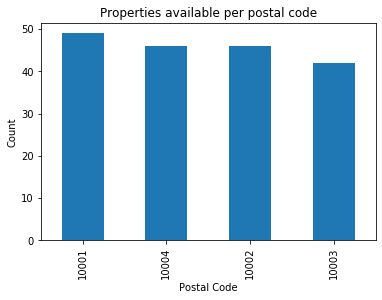

In [0]:
property_data['postal_code'].value_counts().plot(kind='bar')
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.title('Properties available per postal code')

In [0]:
property_data['price']=property_data['price'].str.split(',').str.join('')

In [0]:
property_data.head()

,address,city,state,postal_code,price,beds,baths,sqft,type
0,515 W 29th St APT 3N,new york,NY,10001,5250000,2,3,"2,133",Condo
1,515 W 29th St APT 3S,new york,NY,10001,5450000,2,3,"2,140",Condo
2,515 W 29th St APT 5S,new york,NY,10001,5750000,2,3,"2,140",Condo
3,357 W 30TH St APT 2,new york,NY,10001,675000,Studio,1,453,Condo
4,520 W 28th St # 5,new york,NY,10001,6450000,3,4,"2,065",Condo


In [0]:
#converting price to float for statistics purposes.
property_data['price'] = property_data['price'].astype('float')

In [0]:
property_data['price'].dtypes

dtype('float64')

In [0]:
property_data.groupby(['postal_code','beds','baths'])['price'].mean()

postal_code  beds    baths
10001        1       1        1.451652e+06
                     2        1.433333e+06
             2       1        1.064333e+06
                     2        2.923333e+06
                     3        4.861250e+06
             3       3        2.550000e+06
                     4        6.200000e+06
             4       5        1.600000e+07
             5       5        9.750000e+06
             Studio  1        6.860714e+05
10002        1       1        7.951875e+05
                     2        2.650000e+06
             2       1        7.311818e+05
                     2        2.307625e+06
             3       2        3.513000e+06
                     3        4.201333e+06
                     4        6.605000e+06
             5       6        1.609500e+07
             Studio  1        5.300000e+05
10003        1       1        9.504073e+05
                     2        3.250000e+06
             2       2        2.531500e+06
                     3     

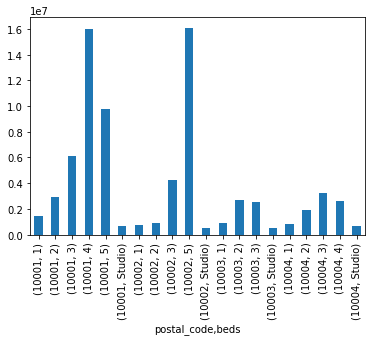

In [0]:
property_data.groupby(['postal_code','beds'])['price'].median().plot(kind='bar')

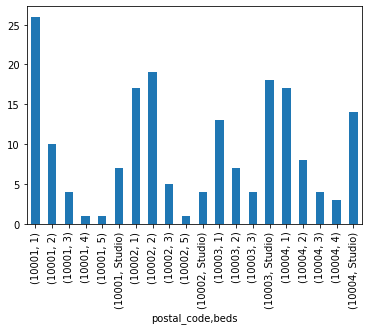

In [0]:
property_data.groupby(['postal_code','beds'])['postal_code'].count().plot(kind='bar')

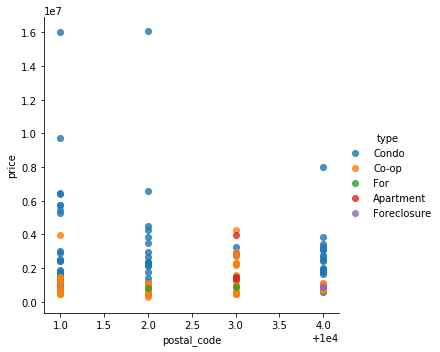

In [0]:
# Scatterplot arguments
sns.lmplot(x='postal_code', y='price', data=property_data,
           fit_reg=False, # No regression line
           hue='type') 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


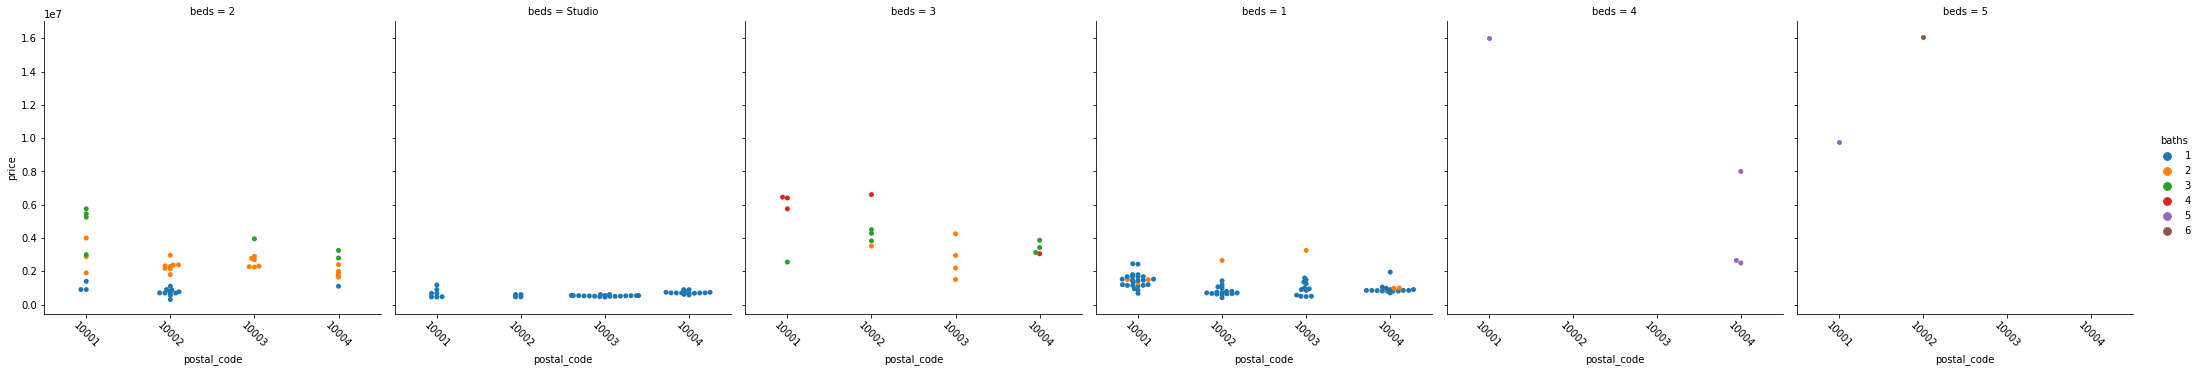

In [0]:
g = sns.factorplot(x='postal_code', 
                   y='price', 
                   data=property_data, 
                   hue='baths',  # Color by baths
                   col='beds',  # Separate by beds
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)